In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv


In [2]:
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')

### 查看四个表格的形状

In [3]:
print('test_identity的形状：{}'.format(test_identity.shape))
print('test_transaction的形状：{}'.format(test_transaction.shape))
print('train_identity的形状：{}'.format(train_identity.shape))
print('train_transaction的形状：{}'.format(train_transaction.shape))

test_identity的形状：(141907, 41)
test_transaction的形状：(506691, 393)
train_identity的形状：(144233, 41)
train_transaction的形状：(590540, 394)


### 大概看下数据的样子

In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 一共两个表 transaciton 和 identity
#### transaction的列名如下

In [6]:
for x in train_transaction.columns:
    print(x)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

#### identity列名如下

In [7]:
for x in train_identity.columns:
    print(x)

TransactionID
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo


### 合并transaction和identity

In [8]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [9]:
del train_identity, train_transaction, test_identity, test_transaction

### 查看合并后的样子

In [11]:
print('train的形状：{} 原来是: (144233, 41)和(590540,394)'.format(train.shape))
print('test的形状：{} 原来是:  (141907,41)和(506691, 393)'.format(test.shape))
print('''
test_identity的形状：(141907, 41)
test_transaction的形状：(506691, 393)
train_identity的形状：(144233, 41)
train_transaction的形状：(590540, 394)
''')

train的形状：(590540, 434) 原来是: (144233, 41)和(590540,394)
test的形状：(506691, 433) 原来是:  (141907,41)和(506691, 393)

test_identity的形状：(141907, 41)
test_transaction的形状：(506691, 393)
train_identity的形状：(144233, 41)
train_transaction的形状：(590540, 394)



In [12]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [13]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 查看train和test的缺失值情况

In [38]:
null_num1 = train.isnull().any().sum()
null_num2 = test.isnull().any().sum()
print(f'train共有{train.shape[1]}列，其中有{null_num1}列是有缺失值的')
print(f'test共有{test.shape[1]}列，其中有{null_num2}列是有缺失值的')

train共有434列，其中有414列是有缺失值的
test共有433列，其中有385列是有缺失值的


In [70]:
#建立一个记录缺失值比例的DataFrame
train_null_col_ratio = pd.Series([],name='train缺失值比例')
print(f'train分别有以下几列是有空缺值的(每列总共有{train.shape[1]}个数据)')
print('有缺失值的列','\t\t\t\t\t','缺失值的数量''\t','缺失值数量占总体的百分比')
tell_if_null = train.isnull().any()
null_columns = tell_if_null[tell_if_null==1]
i=0#计数器而已
for null_column in null_columns.index:
    num_of_nulls = sum(train[null_column].isnull())
    print("{:<40}\t{:>10}\t{:>10.2%}".format(null_column,num_of_nulls,(num_of_nulls/train.shape[0])))
    train_null_col_ratio[i] = num_of_nulls/train.shape[0]
    i += 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


train分别有以下几列是有空缺值的(每列总共有434个数据)
有缺失值的列 					 缺失值的数量	 缺失值数量占总体的百分比
card2                                   	      8933	     1.51%
card3                                   	      1565	     0.27%
card4                                   	      1577	     0.27%
card5                                   	      4259	     0.72%
card6                                   	      1571	     0.27%
addr1                                   	     65706	    11.13%
addr2                                   	     65706	    11.13%
dist1                                   	    352271	    59.65%
dist2                                   	    552913	    93.63%
P_emaildomain                           	     94456	    15.99%
R_emaildomain                           	    453249	    76.75%
D1                                      	      1269	     0.21%
D2                                      	    280797	    47.55%
D3                                      	    262878	    44.51%
D4                                      	    168922	

V95                                     	       314	     0.05%
V96                                     	       314	     0.05%
V97                                     	       314	     0.05%
V98                                     	       314	     0.05%
V99                                     	       314	     0.05%
V100                                    	       314	     0.05%
V101                                    	       314	     0.05%
V102                                    	       314	     0.05%
V103                                    	       314	     0.05%
V104                                    	       314	     0.05%
V105                                    	       314	     0.05%
V106                                    	       314	     0.05%
V107                                    	       314	     0.05%
V108                                    	       314	     0.05%
V109                                    	       314	     0.05%
V110                                    	       314	   

V226                                    	    460110	    77.91%
V227                                    	    449124	    76.05%
V228                                    	    460110	    77.91%
V229                                    	    460110	    77.91%
V230                                    	    460110	    77.91%
V231                                    	    460110	    77.91%
V232                                    	    460110	    77.91%
V233                                    	    460110	    77.91%
V234                                    	    449124	    76.05%
V235                                    	    460110	    77.91%
V236                                    	    460110	    77.91%
V237                                    	    460110	    77.91%
V238                                    	    449124	    76.05%
V239                                    	    449124	    76.05%
V240                                    	    460110	    77.91%
V241                                    	    460110	   

id_20                                   	    451279	    76.42%
id_21                                   	    585381	    99.13%
id_22                                   	    585371	    99.12%
id_23                                   	    585371	    99.12%
id_24                                   	    585793	    99.20%
id_25                                   	    585408	    99.13%
id_26                                   	    585377	    99.13%
id_27                                   	    585371	    99.12%
id_28                                   	    449562	    76.13%
id_29                                   	    449562	    76.13%
id_30                                   	    512975	    86.87%
id_31                                   	    450258	    76.25%
id_32                                   	    512954	    86.86%
id_33                                   	    517251	    87.59%
id_34                                   	    512735	    86.82%
id_35                                   	    449555	   

In [71]:
#建立一个记录缺失值比例的DataFrame
test_null_col_ratio = pd.Series([],name='test缺失值比例')
print(f'test分别有以下几列是有空缺值的(每列总共有{train.shape[1]}个数据)')
print('有缺失值的列','\t\t\t\t\t','缺失值的数量''\t','缺失值数量占总体的百分比')
tell_if_null = test.isnull().any()
null_columns = tell_if_null[tell_if_null==1]
i=0#计数器而已
for null_column in null_columns.index:
    num_of_nulls = sum(test[null_column].isnull())
    print("{:<40}\t{:>10}\t{:>10.2%}".format(null_column,num_of_nulls,(num_of_nulls/test.shape[0])))
    test_null_col_ratio[i] = num_of_nulls/test.shape[0]
    i += 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


test分别有以下几列是有空缺值的(每列总共有434个数据)
有缺失值的列 					 缺失值的数量	 缺失值数量占总体的百分比
card2                                   	      8654	     1.71%
card3                                   	      3002	     0.59%
card4                                   	      3086	     0.61%
card5                                   	      4547	     0.90%
card6                                   	      3007	     0.59%
addr1                                   	     65609	    12.95%
addr2                                   	     65609	    12.95%
dist1                                   	    291217	    57.47%
dist2                                   	    470255	    92.81%
P_emaildomain                           	     69192	    13.66%
R_emaildomain                           	    370821	    73.18%
C1                                      	         3	     0.00%
C2                                      	         3	     0.00%
C3                                      	         3	     0.00%
C4                                      	         3	 

V83                                     	     12081	     2.38%
V84                                     	     12081	     2.38%
V85                                     	     12081	     2.38%
V86                                     	     12081	     2.38%
V87                                     	     12081	     2.38%
V88                                     	     12081	     2.38%
V89                                     	     12081	     2.38%
V90                                     	     12081	     2.38%
V91                                     	     12081	     2.38%
V92                                     	     12081	     2.38%
V93                                     	     12081	     2.38%
V94                                     	     12081	     2.38%
V138                                    	    430906	    85.04%
V139                                    	    430906	    85.04%
V140                                    	    430906	    85.04%
V141                                    	    430906	   

V259                                    	    369375	    72.90%
V260                                    	    379963	    74.99%
V261                                    	    379963	    74.99%
V262                                    	    379963	    74.99%
V263                                    	    379963	    74.99%
V264                                    	    379963	    74.99%
V265                                    	    379963	    74.99%
V266                                    	    379963	    74.99%
V267                                    	    379963	    74.99%
V268                                    	    379963	    74.99%
V269                                    	    379963	    74.99%
V270                                    	    369375	    72.90%
V271                                    	    369375	    72.90%
V272                                    	    369375	    72.90%
V273                                    	    379963	    74.99%
V274                                    	    379963	   

### train 和 test 缺失值的直方图，横坐标：缺失值百分比，纵坐标：频数

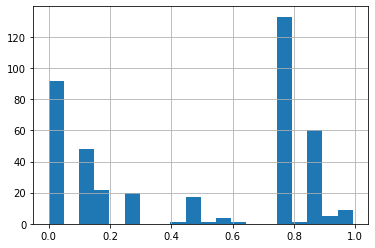

In [77]:
import matplotlib.pyplot as plt
train_null_col_ratio.hist(bins=20)
#plt.title('train 缺失值比例')

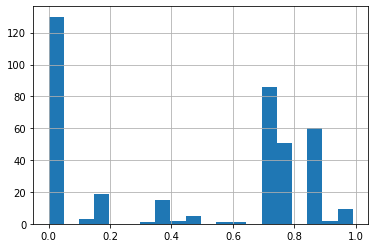

In [78]:
test_null_col_ratio.hist(bins=20)

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [89]:
for x,y in zip(train.iloc[0,:],train.columns):
    print(y,':',x)

TransactionID : 2987000
isFraud : 0
TransactionDT : 86400
TransactionAmt : 68.5
ProductCD : W
card1 : 13926
card2 : nan
card3 : 150.0
card4 : discover
card5 : 142.0
card6 : credit
addr1 : 315.0
addr2 : 87.0
dist1 : 19.0
dist2 : nan
P_emaildomain : nan
R_emaildomain : nan
C1 : 1.0
C2 : 1.0
C3 : 0.0
C4 : 0.0
C5 : 0.0
C6 : 1.0
C7 : 0.0
C8 : 0.0
C9 : 1.0
C10 : 0.0
C11 : 2.0
C12 : 0.0
C13 : 1.0
C14 : 1.0
D1 : 14.0
D2 : nan
D3 : 13.0
D4 : nan
D5 : nan
D6 : nan
D7 : nan
D8 : nan
D9 : nan
D10 : 13.0
D11 : 13.0
D12 : nan
D13 : nan
D14 : nan
D15 : 0.0
M1 : T
M2 : T
M3 : T
M4 : M2
M5 : F
M6 : T
M7 : nan
M8 : nan
M9 : nan
V1 : 1.0
V2 : 1.0
V3 : 1.0
V4 : 1.0
V5 : 1.0
V6 : 1.0
V7 : 1.0
V8 : 1.0
V9 : 1.0
V10 : 0.0
V11 : 0.0
V12 : 1.0
V13 : 1.0
V14 : 1.0
V15 : 0.0
V16 : 0.0
V17 : 0.0
V18 : 0.0
V19 : 1.0
V20 : 1.0
V21 : 0.0
V22 : 0.0
V23 : 1.0
V24 : 1.0
V25 : 1.0
V26 : 1.0
V27 : 0.0
V28 : 0.0
V29 : 0.0
V30 : 0.0
V31 : 0.0
V32 : 0.0
V33 : 0.0
V34 : 0.0
V35 : nan
V36 : nan
V37 : nan
V38 : nan
V39 : nan
V

## 删掉缺失值过多的

In [99]:
train.shape

(590540, 434)

In [92]:
train_null_col_ratio[train_null_col_ratio<0.5]

0      0.015127
1      0.002650
2      0.002670
3      0.007212
4      0.002660
         ...   
351    0.000020
352    0.000020
353    0.000020
354    0.000020
355    0.000020
Name: train缺失值比例, Length: 200, dtype: float64

### 查看每列的分布

### 去除缺失值大于50%的列

In [113]:
needed_columns = []
ratio = 0.5
for x in train.columns:
    if train[x].isnull().sum()/train.shape[0]<ratio:
        needed_columns.append(x)

In [114]:
needed_columns_test = []
ratio = 0.5
for x in test.columns:
    if test[x].isnull().sum()/test.shape[0]<ratio:
        needed_columns_test.append(x)

In [118]:
train_new = train[needed_columns]

In [119]:
test_new = test[needed_columns_test]

### 现在初步清洗出来了缺失值在50%一下的变量，然后分别查看诈骗的缺失值情况和非诈骗的缺失值情况

In [138]:
train_isfraud = train_new.loc[train_new['isFraud']==1,:]
train_isnotfraud = train_new.loc[train_new['isFraud']!=1,:]

In [147]:
print('train_isfraud缺失值情况: isfraud\tisnotfraud')
for x,y in zip(train_isfraud.columns,train_isnotfraud.columns):
    print('{:21}: {:.2f}\t{:.2f}'.format(x,train_isfraud[x].isnull().sum()/train_isfraud.shape[0],train_isnotfraud[x].isnull().sum()/train_isnotfraud.shape[0]))

train_isfraud缺失值情况: isfraud	isnotfraud
TransactionID        : 0.00	0.00
isFraud              : 0.00	0.00
TransactionDT        : 0.00	0.00
TransactionAmt       : 0.00	0.00
ProductCD            : 0.00	0.00
card1                : 0.00	0.00
card2                : 0.02	0.01
card3                : 0.00	0.00
card4                : 0.00	0.00
card5                : 0.01	0.01
card6                : 0.00	0.00
addr1                : 0.37	0.10
addr2                : 0.37	0.10
P_emaildomain        : 0.14	0.16
C1                   : 0.00	0.00
C2                   : 0.00	0.00
C3                   : 0.00	0.00
C4                   : 0.00	0.00
C5                   : 0.00	0.00
C6                   : 0.00	0.00
C7                   : 0.00	0.00
C8                   : 0.00	0.00
C9                   : 0.00	0.00
C10                  : 0.00	0.00
C11                  : 0.00	0.00
C12                  : 0.00	0.00
C13                  : 0.00	0.00
C14                  : 0.00	0.00
D1                   : 0.00	0.00
D2  